In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt


urlfull = 'https://raw.githubusercontent.com/bakerb545/ColabData/master/bank-full.csv'
url10 = 'https://raw.githubusercontent.com/bakerb545/ColabData/master/bank.csv'
b10 = pd.read_csv(url10)
bfull = pd.read_csv(urlfull)

In [0]:
print(b10.describe())
print(bfull.describe())
print(b10.columns)
print(b10.groupby('y').count())
print(bfull.groupby('y').count())

               age       balance  ...        pdays     previous
count  4521.000000   4521.000000  ...  4521.000000  4521.000000
mean     41.170095   1422.657819  ...    39.766645     0.542579
std      10.576211   3009.638142  ...   100.121124     1.693562
min      19.000000  -3313.000000  ...    -1.000000     0.000000
25%      33.000000     69.000000  ...    -1.000000     0.000000
50%      39.000000    444.000000  ...    -1.000000     0.000000
75%      49.000000   1480.000000  ...    -1.000000     0.000000
max      87.000000  71188.000000  ...   871.000000    25.000000

[8 rows x 7 columns]
                age        balance  ...         pdays      previous
count  45211.000000   45211.000000  ...  45211.000000  45211.000000
mean      40.936210    1362.272058  ...     40.197828      0.580323
std       10.618762    3044.765829  ...    100.128746      2.303441
min       18.000000   -8019.000000  ...     -1.000000      0.000000
25%       33.000000      72.000000  ...     -1.000000      0.0

        education  marital housing         job     y
count        4521     4521    4521        4521  4521
unique          4        3       2          12     2
top     secondary  married     yes  management    no
freq         2306     2797    2559         969  4000
           marital  housing   job     y
education                              
primary        678      678   678   678
secondary     2306     2306  2306  2306
tertiary      1350     1350  1350  1350
unknown        187      187   187   187
AxesSubplot(0.125,0.125;0.775x0.755)


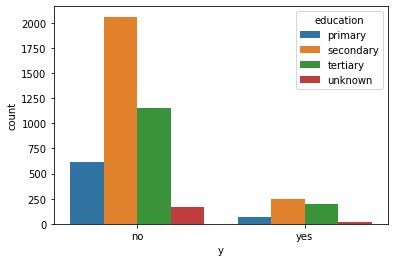

In [0]:
#print(b10)
cols = ['education', 'marital', 'housing', 'job', 'y']
ehm = pd.DataFrame(b10[cols])
print(ehm.describe())
print(ehm.groupby('education').count())
print(sns.countplot(x='y', data=ehm, hue = 'education'))


#help(sns.countplot)

      education   y
0       primary  no
1     secondary  no
2      tertiary  no
3      tertiary  no
4     secondary  no
...         ...  ..
4516  secondary  no
4517   tertiary  no
4518  secondary  no
4519  secondary  no
4520   tertiary  no

[4521 rows x 2 columns]
y            no  yes   All  proportion_yes  proportion_no
education                                                
primary     614   64   678        9.439528      90.560472
secondary  2061  245  2306       10.624458      89.375542
tertiary   1157  193  1350       14.296296      85.703704
unknown     168   19   187       10.160428      89.839572
All        4000  521  4521       11.523999      88.476001
Index(['primary', 'secondary', 'tertiary', 'unknown', 'All'], dtype='object', name='education')
AxesSubplot(0.125,0.125;0.775x0.755)


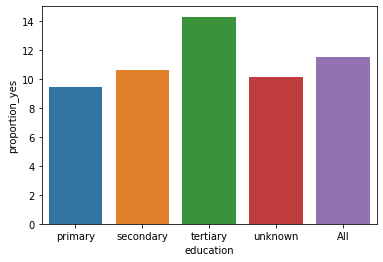

In [0]:
df = ['education', 'y']
scaleddf = pd.DataFrame(ehm[df])
print(scaleddf)

result = pd.crosstab(index=scaleddf['education'], columns=scaleddf['y'], margins=True)
result['proportion_yes'] = result['yes']/result['All']*100
result['proportion_no'] = result['no']/result['All']*100
print(result)
print(result.index)
print(sns.barplot(x=result.index, y='proportion_yes', data=result)) 



AxesSubplot(0.125,0.125;0.775x0.755)


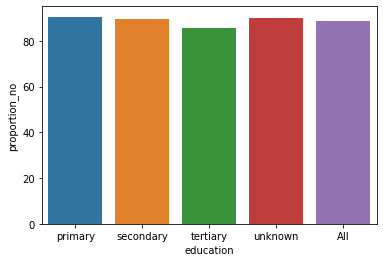

In [0]:
print(sns.barplot(x=result.index, y='proportion_no', data=result)) 

AxesSubplot(0.125,0.125;0.775x0.755)


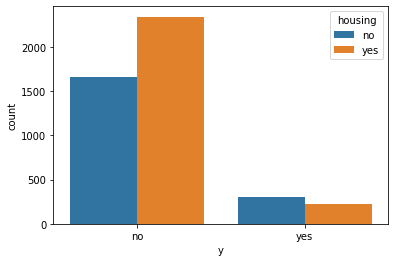

In [0]:
print(sns.countplot(x='y', data=ehm, hue = 'housing'))

     housing   y
0         no  no
1        yes  no
2        yes  no
3        yes  no
4        yes  no
...      ...  ..
4516     yes  no
4517     yes  no
4518      no  no
4519      no  no
4520     yes  no

[4521 rows x 2 columns]
y          no  yes   All  proportion_yes  proportion_no
housing                                                
no       1661  301  1962       15.341488      84.658512
yes      2339  220  2559        8.597108      91.402892
All      4000  521  4521       11.523999      88.476001
Index(['no', 'yes', 'All'], dtype='object', name='housing')
(3, 5)
(3,)
AxesSubplot(0.125,0.125;0.775x0.755)


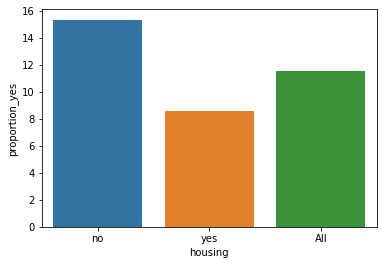

In [0]:
df = ['housing', 'y']
scaleddf = pd.DataFrame(ehm[df])
print(scaleddf)

result = pd.crosstab(index=scaleddf['housing'], columns=scaleddf['y'], margins=True)
result['proportion_yes'] = result['yes']/result['All']*100
result['proportion_no'] = result['no']/result['All']*100
print(result)
print(result.index)
print(result.shape)
print(result.index.shape)
xtra = ['proportion_yes', 'proportion_no']
print(sns.barplot(x=result.index, y='proportion_yes', data=result[xtra]))


AxesSubplot(0.125,0.125;0.775x0.755)


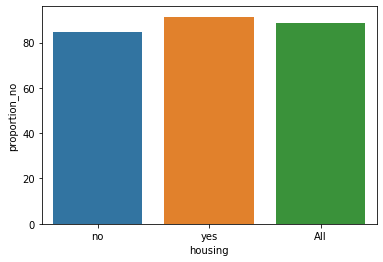

In [0]:
print(sns.barplot(x=result.index, y='proportion_no', data=result[xtra]))

AxesSubplot(0.125,0.125;0.775x0.755)


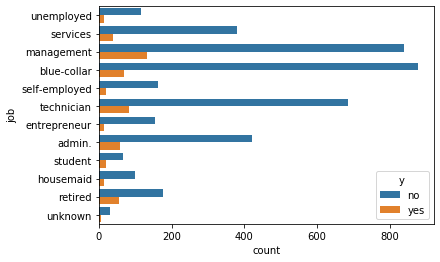

In [0]:
print(sns.countplot(y='job', data=ehm, hue = 'y'))

                job   y
0        unemployed  no
1          services  no
2        management  no
3        management  no
4       blue-collar  no
...             ...  ..
4516       services  no
4517  self-employed  no
4518     technician  no
4519    blue-collar  no
4520   entrepreneur  no

[4521 rows x 2 columns]
y                no  yes   All  proportion_yes  proportion_no
job                                                          
admin.          420   58   478       12.133891      87.866109
blue-collar     877   69   946        7.293869      92.706131
entrepreneur    153   15   168        8.928571      91.071429
housemaid        98   14   112       12.500000      87.500000
management      838  131   969       13.519092      86.480908
retired         176   54   230       23.478261      76.521739
self-employed   163   20   183       10.928962      89.071038
services        379   38   417        9.112710      90.887290
student          65   19    84       22.619048      77.380952
techn

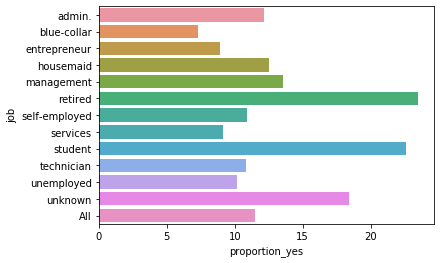

In [0]:
df = ['job', 'y']
scaleddf = pd.DataFrame(ehm[df])
print(scaleddf)

result = pd.crosstab(index=scaleddf['job'], columns=scaleddf['y'], margins=True)
result['proportion_yes'] = result['yes']/result['All']*100
result['proportion_no'] = result['no']/result['All']*100
print(result)
print(result.index)
print(sns.barplot(x='proportion_yes', y =result.index, data=result)) 

AxesSubplot(0.125,0.125;0.775x0.755)


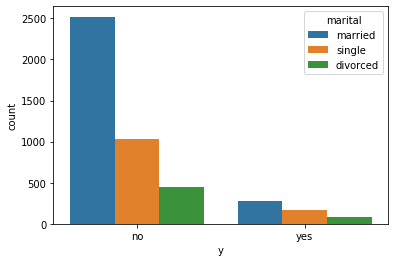

In [0]:
print(sns.countplot(x='y', data=ehm, hue = 'marital'))

      marital   y
0     married  no
1     married  no
2      single  no
3     married  no
4     married  no
...       ...  ..
4516  married  no
4517  married  no
4518  married  no
4519  married  no
4520   single  no

[4521 rows x 2 columns]
y           no  yes   All  proportion_yes  proportion_no
marital                                                 
divorced   451   77   528       14.583333      85.416667
married   2520  277  2797        9.903468      90.096532
single    1029  167  1196       13.963211      86.036789
All       4000  521  4521       11.523999      88.476001
Index(['divorced', 'married', 'single', 'All'], dtype='object', name='marital')
AxesSubplot(0.125,0.125;0.775x0.755)


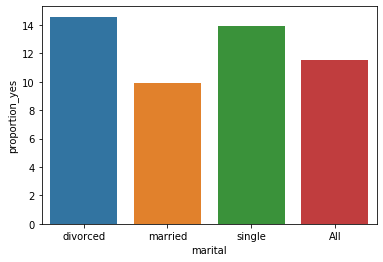

In [0]:
df = ['marital', 'y']
scaleddf = pd.DataFrame(ehm[df])
print(scaleddf)

result = pd.crosstab(index=scaleddf['marital'], columns=scaleddf['y'], margins=True)
result['proportion_yes'] = result['yes']/result['All']*100
result['proportion_no'] = result['no']/result['All']*100
print(result)
print(result.index)
print(sns.barplot(x=result.index, y ='proportion_yes', data=result))

In [0]:
print(b10.head())

   age          job  marital  education  ... pdays  previous poutcome   y
0   30   unemployed  married    primary  ...    -1         0  unknown  no
1   33     services  married  secondary  ...   339         4  failure  no
2   35   management   single   tertiary  ...   330         1  failure  no
3   30   management  married   tertiary  ...    -1         0  unknown  no
4   59  blue-collar  married  secondary  ...    -1         0  unknown  no

[5 rows x 17 columns]


In [0]:
##get dummies for job
x = b10.columns.values
x = x[1:16]
print(x[7])
x = np.delete(x, 7)
print(x[8])
x = np.delete(x, 8)
print(x[7])
x = np.delete(x,7)
print(x)
ytrain = pd.DataFrame(b10['y'])
ytrain.loc[ytrain['y'] == 'no', 'y'] = 0
ytrain.loc[ytrain['y'] == 'yes', 'y'] = 1
###xvars is all cols except y
xt = b10[x]
######MAYBE BINARIZE DEFAULT AND LOAN
xtrain = pd.get_dummies(xt, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome'], drop_first=True)
print(xtrain.head())
print(xtrain.columns)
xteststuff = bfull[x]
###could i categorize jobs? Bs, science, humaities, etc.? education may become unncessary
###maybe do classification algo for jobs to split into classes?
###RF on PCA analysis?
  ######PCA with diff # of estimators and RF with diff # of estimators and plot?
xtest = pd.get_dummies(xteststuff, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome'], drop_first=True)
ytest = pd.DataFrame(bfull['y'])
ytest.loc[ytest['y'] == 'no', 'y'] = 0
ytest.loc[ytest['y'] == 'yes', 'y'] = 1
res = pd.DataFrame()
print(res)


contact
month
day
['job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'duration' 'campaign' 'pdays' 'previous' 'poutcome']
   balance  duration  ...  poutcome_success  poutcome_unknown
0     1787        79  ...                 0                 1
1     4789       220  ...                 0                 0
2     1350       185  ...                 0                 0
3     1476       199  ...                 0                 1
4        0       226  ...                 0                 1

[5 rows x 27 columns]
Index(['balance', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'poutcome_other', 'poutco

In [0]:
##OLS Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score 

lm = LinearRegression()
lm.fit(xtrain, ytrain)
trainpred = lm.predict(xtrain)
trainpred = pd.DataFrame(trainpred)
trainpred.rename(columns={trainpred.columns[0]:'y'}, inplace=True)
trainpred.loc[trainpred['y'] >= .5, 'y'] = 1
trainpred.loc[trainpred['y'] < .5, 'y'] = 0
print(accuracy_score(ytrain, trainpred))

testpred = lm.predict(xtest)
testpred = pd.DataFrame(testpred)
testpred.rename(columns={testpred.columns[0]:'y'}, inplace=True)
testpred1 = testpred.copy()
testpred2 = testpred.copy()
testpred.loc[testpred['y'] >= .5, 'y'] = 1
testpred.loc[testpred['y'] < .5, 'y'] = 0
print(accuracy_score(ytest, testpred))




0.8986949789869498
0.8977903607529141


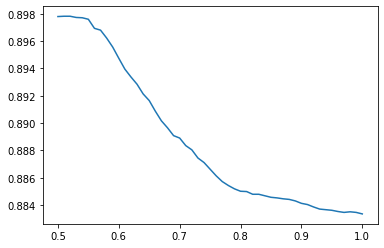

1.0000000000000004 0.8833469730817721


In [0]:
lyst1 = []
lyst2=[]
x = .5
while x<1.01:
  lyst1.append(x)
  testpred2.loc[testpred1['y'] >= x, 'y'] = 1
  testpred2.loc[testpred1['y'] < x, 'y'] = 0
  lyst2.append(accuracy_score(ytest, testpred2))
  x+=.01
plt.plot(lyst1, lyst2)
plt.show()
print(lyst1[-1], lyst2[-1])


In [0]:
###Logistic Regression
from sklearn.linear_model import LogisticRegression
clas = LogisticRegression(random_state=99)
clas.fit(xtrain, ytrain)
trainpred = clas.predict(xtrain)
testpred = clas.predict(xtest)
trainpred = pd.DataFrame(trainpred)
trainpred.rename(columns={trainpred.columns[0]:'y'}, inplace=True)
print(accuracy_score(ytrain, trainpred))
testpred = pd.DataFrame(testpred)
testpred.rename(columns={testpred.columns[0]:'y'}, inplace=True)
print(accuracy_score(ytest, testpred))
res = pd.DataFrame(columns = ['Algorithm', 'Train', 'Test'])
res = res.append({'Algorithm' : 'Logistic' , 'Train' : accuracy_score(ytrain, trainpred), 'Test': accuracy_score(ytest, testpred)} , ignore_index=True)
print(res)

0.9011280690112807
0.8998252637632435
  Algorithm     Train      Test
0  Logistic  0.901128  0.899825


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
##KNN using (3-6 neighbors)
from sklearn.neighbors import KNeighborsClassifier
for x in range(1,7):
  clas = KNeighborsClassifier(n_neighbors = x)
  clas.fit(xtrain, ytrain['y'])
  trainpred = clas.predict(xtrain)
  testpred = clas.predict(xtest)
  print("{} neighbors".format(x))
  print(accuracy_score(ytrain, trainpred))
  print(accuracy_score(ytest, testpred))
  res = res.append({'Algorithm' : 'KNN ('+str(x)+')' , 'Train' : accuracy_score(ytrain, trainpred), 'Test': accuracy_score(ytest, testpred)} , ignore_index=True)


1 neighbors
1.0
0.8617593063634956
2 neighbors
0.9205927892059279
0.8849395058724646
3 neighbors
0.920371599203716
0.8789675079073677
4 neighbors
0.9084273390842734
0.8859569573776294
5 neighbors
0.9066578190665782
0.8833469730817721
6 neighbors
0.8984737889847378
0.8848731503395192


[0.10571536 0.08886509 0.07035273 0.05313587 0.04819438]


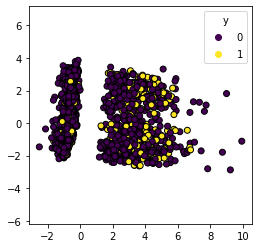

In [0]:
###PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
xpca = xtrain.copy()
#print(xpca)
xpca = StandardScaler().fit_transform(xpca)
#print(xpca)
pca = PCA(n_components=5,random_state=99)
xpca = pca.fit_transform(xpca)
print(pca.explained_variance_ratio_)
plt.figure(figsize=(4,4))
scatter = plt.scatter(xpca[:,0], xpca[:,1],c = ytrain['y'], edgecolor = "black")
plt.legend(*scatter.legend_elements(), title = 'y')
plt.axis('equal')
plt.show()

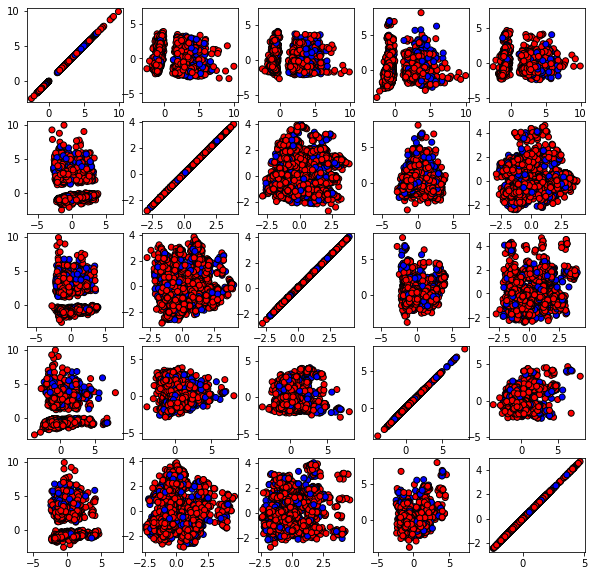

In [0]:
colorClass = [val for val in ytrain['y']]
for i in range(len(colorClass)):
    val = colorClass[i]
    if val == 0:
        colorClass[i] ='r'
    elif val == 1:
        colorClass[i] ='b'
plt.figure(figsize=(10,10))
for i in range(5):
    for j in range(5):
        plt.subplot(5, 5, i * 5 + j + 1)
        plt.scatter(xpca[:,i], xpca[:,j], c = colorClass, edgecolor = "black")
        plt.gca().set_xlim(-40,40)
        plt.gca().set_ylim(-40,40)
        plt.axis('equal')
        plt.gca().set_aspect('equal')

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


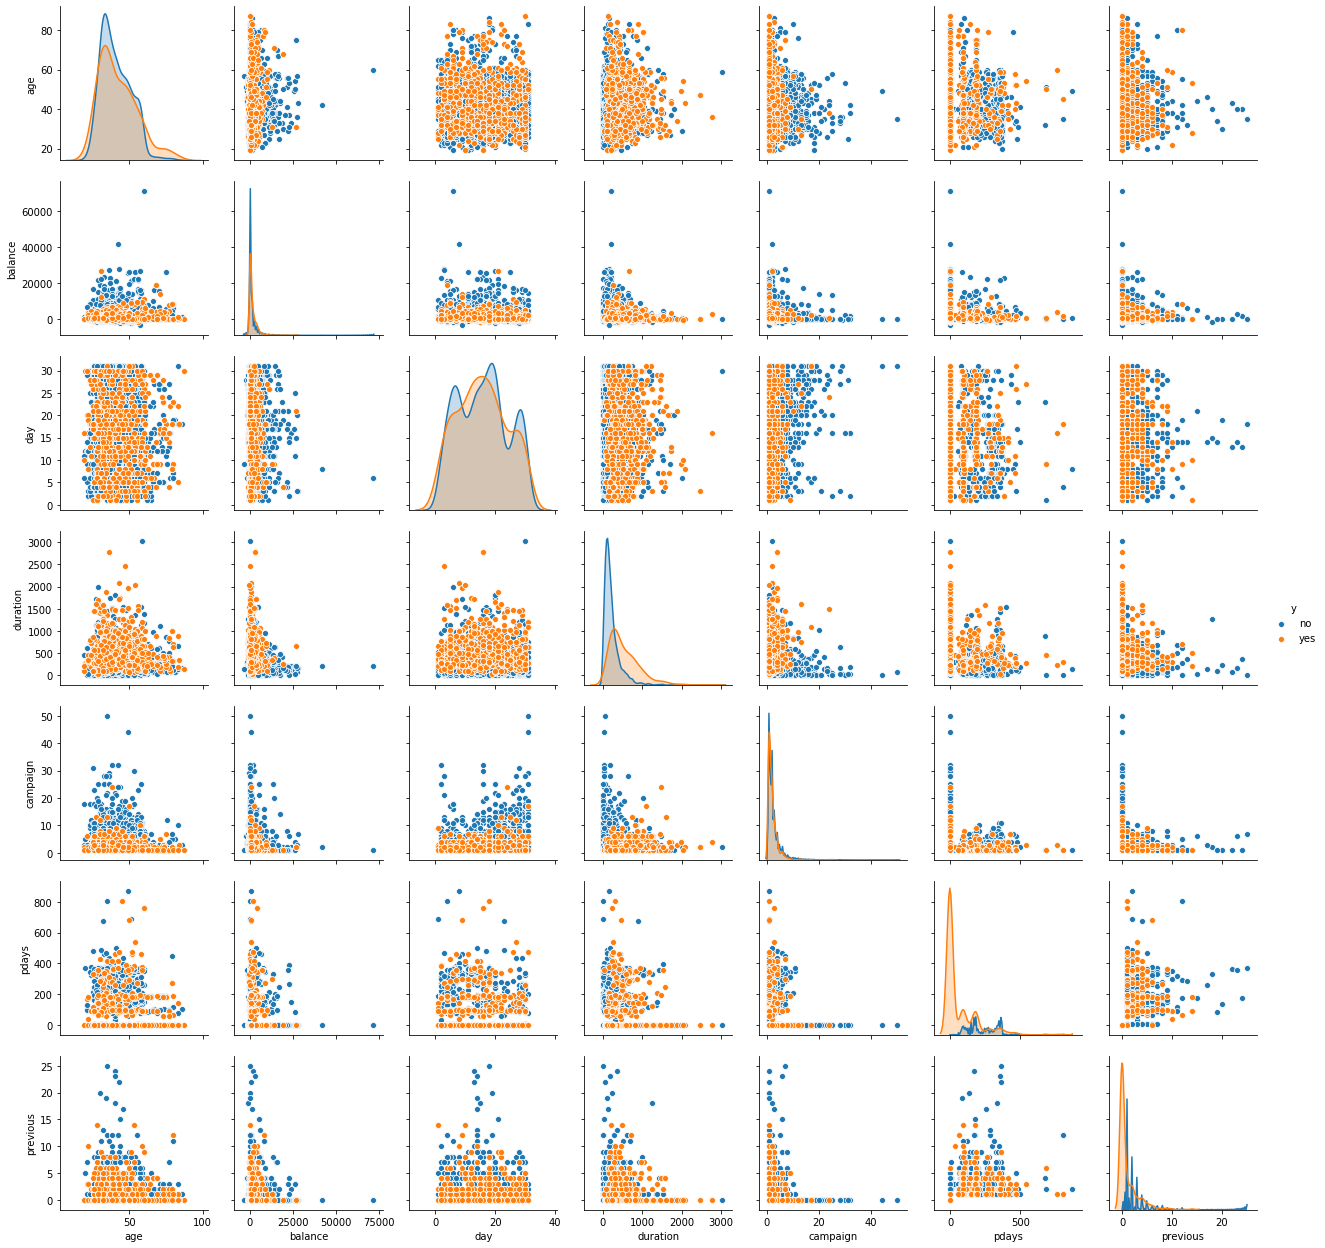

In [0]:
ypair = b10['y'].copy()
ypair = pd.DataFrame(ypair)
ypair.rename(columns={ypair.columns[0]:'y'}, inplace=True)
#ypair.loc[ypair['y']=='no', 'y'] = 0
#ypair.loc[ypair['y']=='yes', 'y'] = 1
print(b10.columns)
#paircols = ['age', 'balance', 'y']
#xpair = b10[paircols].copy()
sns.pairplot(b10, hue = 'y')

0.8436186684361867


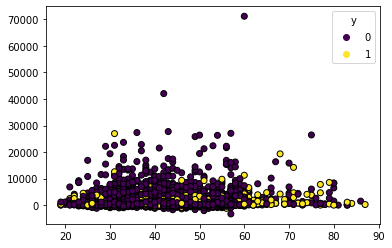

In [0]:
##Cluster Analysis
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=99)
cols2 = ['age', 'balance']
##xt is a sliced b10
xcl = b10[cols2].copy()
#print(xcl.columns)

kmeans.fit(xcl)
y_kmeans = kmeans.predict(xcl)
###ytrain is b10['y']
print(accuracy_score(ytrain, y_kmeans))

scatter = plt.scatter(xcl['age'], xcl['balance'], c=ytrain['y'], edgecolor = "black")
plt.legend(*scatter.legend_elements(), title = 'y')
plt.show()

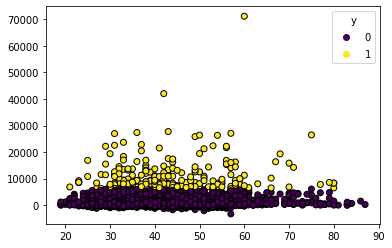

In [0]:
plt.scatter(xcl['age'], xcl['balance'], c=y_kmeans, edgecolor="black")
plt.legend(*scatter.legend_elements(), title = 'y')
plt.show()

0.48064587480645876


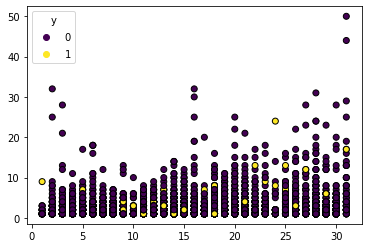

In [0]:
kmeans = KMeans(n_clusters=2,random_state=99)
cols2 = ['day', 'campaign']
##xt is a sliced b10
xcl = b10[cols2].copy()
#print(xcl.columns)

kmeans.fit(xcl)
y_kmeans = kmeans.predict(xcl)
###ytrain is b10['y']
print(accuracy_score(ytrain, y_kmeans))
plt.scatter(xcl['day'], xcl['campaign'], c=ytrain['y'], edgecolor="black")
plt.legend(*scatter.legend_elements(), title = 'y')
plt.show()

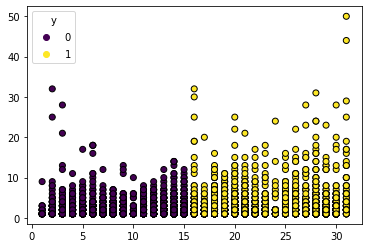

In [0]:
plt.scatter(xcl['day'], xcl['campaign'], c=y_kmeans, edgecolor="black")
plt.legend(*scatter.legend_elements(), title = 'y')
plt.show()

0.39526653395266537


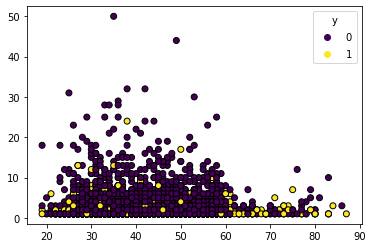

In [0]:
kmeans = KMeans(n_clusters=2,random_state=99)
cols2 = ['age', 'campaign']
##xt is a sliced b10
xcl = b10[cols2].copy()
#print(xcl.columns)

kmeans.fit(xcl)
y_kmeans = kmeans.predict(xcl)
###ytrain is b10['y']
print(accuracy_score(ytrain, y_kmeans))
plt.scatter(xcl['age'], xcl['campaign'], c=ytrain['y'], edgecolor="black")
plt.legend(*scatter.legend_elements(), title = 'y')
plt.show()

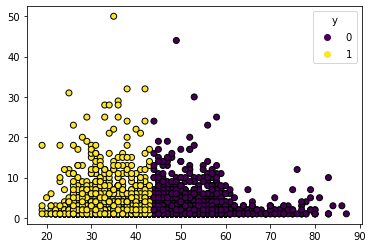

In [0]:
plt.scatter(xcl['age'], xcl['campaign'], c=y_kmeans, edgecolor="black")
plt.legend(*scatter.legend_elements(), title = 'y')
plt.show()

In [0]:
####Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=99)
clf.fit(xtrain, ytrain)
print(clf.score(xtrain, ytrain))
print(clf.score(xtest, ytest))
res = res.append({'Algorithm' : 'Decision Tree' , 'Train' : clf.score(xtrain, ytrain), 'Test': clf.score(xtest, ytest)} , ignore_index=True)

1.0
0.8656300457853178


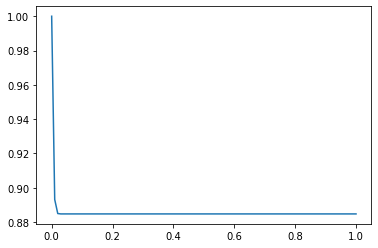

1.0000000000000007 0.8847600088476001
Minimum impurity decrease that produces the highest train accuracy: 0 1.0


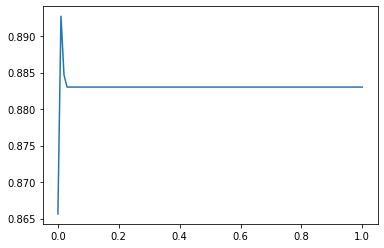

1.0000000000000007 0.8830151954170445
Minimum impurity decrease that produces the highest test accuracy: 0.01 0.8927252217380726


In [0]:
lyst1 = []
lyst2=[]
lyst3 = []
x = 0
while x<1.01:
  lyst1.append(x)
  clfh = DecisionTreeClassifier(min_impurity_decrease=x,random_state=99)
  clfh.fit(xtrain, ytrain)  
  lyst2.append(clfh.score(xtrain, ytrain))
  lyst3.append(clfh.score(xtest, ytest))
  x+=.01
plt.plot(lyst1, lyst2)
plt.show()
print(lyst1[-1], lyst2[-1])
ind = lyst2.index(max(lyst2))
print("Minimum impurity decrease that produces the highest train accuracy:", lyst1[ind], lyst2[ind])
plt.plot(lyst1, lyst3)
plt.show()
print(lyst1[-1], lyst3[-1])
ind = lyst3.index(max(lyst3))
print("Minimum impurity decrease that produces the highest test accuracy:", lyst1[ind], lyst3[ind])


In [0]:
clfh = DecisionTreeClassifier(min_impurity_decrease=.01,random_state=99)
clfh.fit(xtrain, ytrain)
print("Highest accuracy impurity decrease for test data on train data:", clfh.score(xtrain, ytrain))
res = res.append({'Algorithm' : 'Decision Tree (min_impurity_decrease=.01)' , 'Train' : clfh.score(xtrain, ytrain), 'Test': clfh.score(xtest, ytest)} , ignore_index=True)
clfh = DecisionTreeClassifier(random_state=99)
clfh.fit(xtrain, ytrain)
print("Highest accuracy impurity decrease for train data on test data:", clfh.score(xtest, ytest))

Highest accuracy impurity decrease for test data on train data: 0.8931652289316523
Highest accuracy impurity decrease for train data on test data: 0.8656300457853178


In [0]:
###Random Forest
from sklearn.ensemble import RandomForestClassifier
crf = RandomForestClassifier(n_estimators=50,random_state=99)
crf.fit(xtrain, ytrain['y'])
print(crf.score(xtrain, ytrain['y']))
print(crf.score(xtest,ytest['y']))
res = res.append({'Algorithm' : 'Random Forest (n=50)' , 'Train' : crf.score(xtrain, ytrain), 'Test': crf.score(xtest, ytest)} , ignore_index=True)

0.9995576199955762
0.9075667426068877


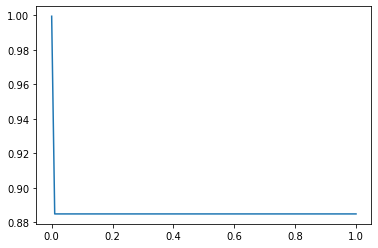

1.0000000000000007 0.8847600088476001
Minimum impurity decrease that produces the highest train accuracy: 0 0.9995576199955762


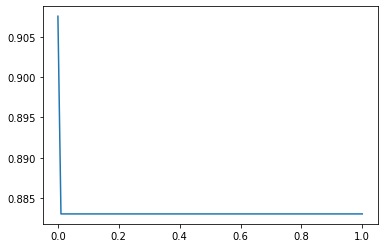

1.0000000000000007 0.8830151954170445
Minimum impurity decrease that produces the highest test accuracy: 0 0.9075667426068877


In [0]:
lyst1 = []
lyst2=[]
lyst3 = []
x = 0
while x<1.01:
  lyst1.append(x)
  crfh = RandomForestClassifier(n_estimators=50,min_impurity_decrease=x, random_state=99)
  crfh.fit(xtrain, ytrain['y'])  
  lyst2.append(crfh.score(xtrain, ytrain['y']))
  lyst3.append(crfh.score(xtest, ytest['y']))
  x+=.01
plt.plot(lyst1, lyst2)
plt.show()
print(lyst1[-1], lyst2[-1])
ind = lyst2.index(max(lyst2))
print("Minimum impurity decrease that produces the highest train accuracy:", lyst1[ind], lyst2[ind])
plt.plot(lyst1, lyst3)
plt.show()
print(lyst1[-1], lyst3[-1])
ind = lyst3.index(max(lyst3))
print("Minimum impurity decrease that produces the highest test accuracy:", lyst1[ind], lyst3[ind])

In [0]:
##Feature Selection using feature selection code
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=99)
forest.fit(xtrain, ytrain['y']) 
model = SelectFromModel(forest, prefit=True, max_features=5)
feature_idx = model.get_support()
feature_names = xtrain.columns[feature_idx]
newxtr = model.transform(xtrain)
pd.DataFrame(newxtr, columns= feature_names)
feature_namestest = xtest.columns[feature_idx]
newxte = model.transform(xtest)
pd.DataFrame(newxte, columns= feature_names)
###what are feature_importances_?
print(forest.feature_importances_)
print(feature_names)

[0.19624281 0.3544359  0.05741335 0.05447748 0.02915333 0.0140566
 0.00677476 0.00566152 0.01158911 0.01930332 0.00522681 0.00833441
 0.0071132  0.01428987 0.00364462 0.00384899 0.02043684 0.01628054
 0.01320377 0.01811822 0.00804332 0.0029302  0.02368    0.0130237
 0.00746492 0.08094358 0.00430884]
Index(['balance', 'duration', 'campaign', 'pdays', 'poutcome_success'], dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
rffi = RandomForestClassifier(n_estimators=50,random_state=99)
rffi.fit(newxtr, ytrain['y'])
print(rffi.score(newxtr, ytrain))
print(rffi.score(newxte,ytest))
res = res.append({'Algorithm' : 'Random Forest: Reduced Dimensions (n=50)' , 'Train' : rffi.score(newxtr, ytrain), 'Test': rffi.score(newxte, ytest)} , ignore_index=True)

0.9993364299933643
0.9025679591249917


In [0]:
from sklearn.tree import DecisionTreeRegressor
dforest = DecisionTreeRegressor(random_state=99)
dforest.fit(xtrain, ytrain['y']) 
model = SelectFromModel(dforest, prefit=True, max_features=5)
feature_idx = model.get_support()
feature_names = xtrain.columns[feature_idx]
newxtr1 = model.transform(xtrain)
pd.DataFrame(newxtr1, columns= feature_names)
feature_namestest = xtest.columns[feature_idx]
newxte1 = model.transform(xtest)
pd.DataFrame(newxte1, columns= feature_names)
###what are feature_importances_?
print(dforest.feature_importances_)
print(feature_names)
print(newxtr1)

[0.19847846 0.32999782 0.04983741 0.05705758 0.02959055 0.0212974
 0.00426789 0.00727704 0.01663893 0.01383632 0.00591904 0.0117864
 0.00616406 0.02083349 0.00511784 0.00146162 0.02186447 0.01517066
 0.01295807 0.02501006 0.00855317 0.00400927 0.01627812 0.01854228
 0.00853295 0.08599384 0.00352525]
Index(['balance', 'duration', 'campaign', 'pdays', 'poutcome_success'], dtype='object')
[[1787   79    1   -1    0]
 [4789  220    1  339    0]
 [1350  185    1  330    0]
 ...
 [ 295  151   11   -1    0]
 [1137  129    4  211    0]
 [1136  345    2  249    0]]


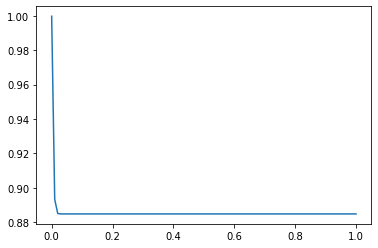

1.0000000000000007 0.8847600088476001
Minimum impurity decrease that produces the highest train accuracy: 0 0.9997788099977881


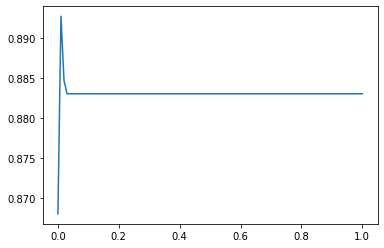

1.0000000000000007 0.8830151954170445
Minimum impurity decrease that produces the highest test accuracy: 0.01 0.8927252217380726


In [0]:
lyst1 = []
lyst2=[]
lyst3 = []
x = 0
while x<1.01:
  lyst1.append(x)
  clfh = DecisionTreeClassifier(min_impurity_decrease=x,random_state=99)
  clfh.fit(newxtr1, ytrain)  
  lyst2.append(clfh.score(newxtr1, ytrain))
  lyst3.append(clfh.score(newxte1, ytest))
  x+=.01
plt.plot(lyst1, lyst2)
plt.show()
print(lyst1[-1], lyst2[-1])
ind = lyst2.index(max(lyst2))
print("Minimum impurity decrease that produces the highest train accuracy:", lyst1[ind], lyst2[ind])
plt.plot(lyst1, lyst3)
plt.show()
print(lyst1[-1], lyst3[-1])
ind = lyst3.index(max(lyst3))
print("Minimum impurity decrease that produces the highest test accuracy:", lyst1[ind], lyst3[ind])


In [0]:
rffi = DecisionTreeClassifier(min_impurity_decrease=.01,random_state=99)
rffi.fit(newxtr1, ytrain['y'])
print(rffi.score(newxtr1, ytrain))
print(rffi.score(newxte1,ytest))
res = res.append({'Algorithm' : 'Decision Tree: Reduced Dimensions (min_impurity_decrease=.01)' , 'Train' : rffi.score(newxtr1, ytrain), 'Test': rffi.score(newxte1, ytest)} , ignore_index=True)

0.8931652289316523
0.8927252217380726


In [0]:
rffi = DecisionTreeClassifier(random_state=99)
rffi.fit(newxtr1, ytrain['y'])
print(rffi.score(newxtr1, ytrain))
print(rffi.score(newxte1,ytest))
res = res.append({'Algorithm' : 'Decision Tree: Reduced Dimensions' , 'Train' : rffi.score(newxtr1, ytrain), 'Test': rffi.score(newxte1, ytest)} , ignore_index=True)

0.9997788099977881
0.8679746079493929


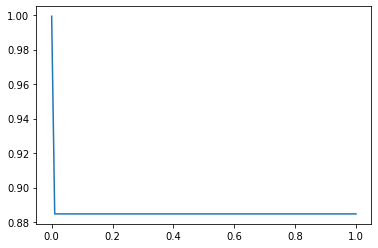

1.0000000000000007 0.8847600088476001
Minimum impurity decrease that produces the highest train accuracy: 0 0.9993364299933643


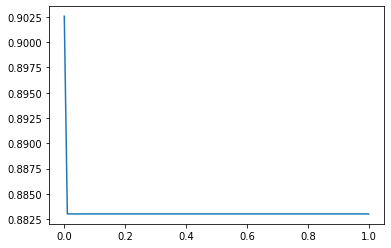

1.0000000000000007 0.8830151954170445
Minimum impurity decrease that produces the highest test accuracy: 0 0.9025679591249917


In [0]:
lyst1 = []
lyst2=[]
lyst3 = []
x = 0
while x<1.01:
  lyst1.append(x)
  crfh = RandomForestClassifier(n_estimators=50,min_impurity_decrease=x, random_state=99)
  crfh.fit(newxtr, ytrain['y'])  
  lyst2.append(crfh.score(newxtr, ytrain['y']))
  lyst3.append(crfh.score(newxte, ytest['y']))
  x+=.01
plt.plot(lyst1, lyst2)
plt.show()
print(lyst1[-1], lyst2[-1])
ind = lyst2.index(max(lyst2))
print("Minimum impurity decrease that produces the highest train accuracy:", lyst1[ind], lyst2[ind])
plt.plot(lyst1, lyst3)
plt.show()
print(lyst1[-1], lyst3[-1])
ind = lyst3.index(max(lyst3))
print("Minimum impurity decrease that produces the highest test accuracy:", lyst1[ind], lyst3[ind])

In [0]:
#res['Accuracy'] = res['Train']*res['Test']
#res.drop('Accuracy', axis=1)
#res1 = res[:, 1:3]
print(res)

                                            Algorithm     Train      Test
0                                            Logistic  0.901128  0.899825
1                                             KNN (1)  1.000000  0.861759
2                                             KNN (2)  0.920593  0.884940
3                                             KNN (3)  0.920372  0.878968
4                                             KNN (4)  0.908427  0.885957
5                                             KNN (5)  0.906658  0.883347
6                                             KNN (6)  0.898474  0.884873
7                                       Decision Tree  1.000000  0.865630
8           Decision Tree (min_impurity_decrease=.01)  0.893165  0.892725
9                                Random Forest (n=50)  0.999558  0.907567
10           Random Forest: Reduced Dimensions (n=50)  0.999336  0.902568
11  Decision Tree: Reduced Dimensions (min_impurit...  0.893165  0.892725
12                  Decision Tree: Red